## Figure 2 - InSAR observations at Shinmoedake from ALOS-1

In [76]:
## Earthquake number distribution

%matplotlib inline
import os
import numpy as np
from datetime import timedelta, datetime as dt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import pyplot as plt, ticker, dates as mdates
from mintpy.defaults.plot import *
from mintpy.utils import utils as ut, ptime, plot as pp, readfile
from mintpy import view, asc_desc2horz_vert

work_dir = os.path.expanduser('~/Documents/Paper/2019_Kirishima/figs_src/obs_ALOS1')
os.chdir(work_dir)
print('Go to directory', work_dir)

# Common settings
event_dates = ptime.date_list2vector(['20080822', '20100710'])[0]#, '20110119'])[0]

Go to directory /Users/yunjunz/Documents/Paper/2019_Kirishima/figs_src/obs_ALOS1


### Read displacement time-series

In [77]:
## ALOS Asc T424
print('-'*20)
data_dir1 = os.path.expanduser('~/insarlab/Kirishima/ShinmoeAlosAT424/mintpy')
ts_file1 = os.path.join(data_dir1, 'timeseries_ERA5_ramp_demErr.h5')
lat1, lon1 = 31.9143, 130.8810
print('ascending 424 at pixel: lat={}, lon={}'.format(lat1, lon1))

ex_dates1 = ptime.date_list2vector(ptime.read_date_list(os.path.join(data_dir1, 'exclude_date.txt')))[0]
dates1, dis1 = ut.read_timeseries_lalo(lat1, lon1, ts_file1, unit='cm', print_msg=False)
print('displacement min/max: {:.1f}/{:.1f} cm'.format(np.min(dis1), np.max(dis1)))

vel_file1 = os.path.join(data_dir1, 'velocity.h5')
y1, x1 = ut.coordinate(atr1).geo2radar(lat1, lon1)[0:2]
vel1 = readfile.read(vel_file1)[0][y1,x1] * 100.
print('velocity: {:.1f} cm/yr'.format(vel1))

atr1 = readfile.read_attribute(vel_file1)
unw_file1 = os.path.join(data_dir1, '{}.unw'.format(atr1['DATE12']))
print('date12:', atr1['DATE12'])

## ALOS Desc T73
print('-'*20)
data_dir2 = os.path.expanduser('~/insarlab/Kirishima/ShinmoeAlosDT73/mintpy')
ts_file2 = os.path.join(data_dir2, 'timeseries_ERA5_ramp_demErr.h5')
lat2, lon2 = 31.9121, 130.8854
print('descending 73 at pixel: lat={}, lon={}'.format(lat2, lon2))

dates2, dis2 = ut.read_timeseries_lalo(lat2, lon2, ts_file2, unit='cm', print_msg=False)
ex_dates2 = ptime.date_list2vector(ptime.read_date_list(os.path.join(data_dir2, 'exclude_date.txt')))[0]
print('displacement min/max: {:.1f}/{:.1f} cm'.format(np.min(dis2), np.max(dis2)))

vel_file2 = os.path.join(data_dir2, 'velocity.h5')
y2, x2 = ut.coordinate(atr2).geo2radar(lat2, lon2)[0:2]
vel2 = readfile.read(vel_file2)[0][y2,x2] * 100.
print('velocity: {:.1f} cm/yr'.format(vel2))

atr2 = readfile.read_attribute(vel_file2)
unw_file2 = os.path.join(data_dir2, '{}.unw'.format(atr2['DATE12']))
print('date12:', atr2['DATE12'])

--------------------
ascending 424 at pixel: lat=31.9143, lon=130.881
displacement min/max: -3.8/2.6 cm
velocity: -2.7 cm/yr
date12: 20080929_20100520
--------------------
descending 73 at pixel: lat=31.9121, lon=130.8854
displacement min/max: -4.4/1.8 cm
velocity: -3.9 cm/yr
date12: 20081012_20100302


### Plot displacement time-series

save figure to file /Users/yunjunz/Documents/Paper/2019_Kirishima/figs_src/obs_ALOS1/dis_ts.png


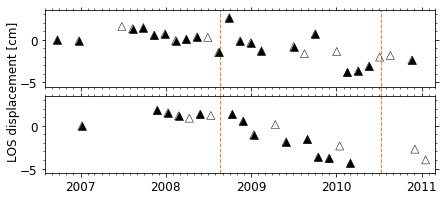

In [90]:
## Figure 2 (a-b)
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=[7, 3], sharex=True)

for ax, dates, dis, ex_dates in zip(axs, [dates1, dates2], [dis1, dis2], [ex_dates1, ex_dates2]):
    ax.scatter(dates, dis, marker='^', edgecolor='k', facecolors='none', s=4**3, linewidths=0.5)
    for dti in dates:
        if dti not in ex_dates:
            ax.scatter(dti, dis[dates==dti], marker='^', edgecolor='k', facecolors='k', s=4**3, linewidths=0.5)

# plot event dates in dashed lines
for ax in axs:
    ymin = -0.2
    if ax == axs[-1]:
        ymin = 0
    for i in range(len(event_dates)):
        ax.axvline(x=event_dates[i], ymin=ymin, c=pp.mplColors[1], linestyle='--', linewidth=1, zorder=0, clip_on=False)

# axes format
for ax in axs:
    ax.tick_params(which='both', direction='out', labelsize=font_size, bottom=True, top=True, left=True, right=True)
    pp.auto_adjust_xaxis_date(ax, dates1)
    ax.set_xlim(dt(2006, 8, 1), dt(2011, 3, 1))
    ax.set_ylim([-5.5, 3.5])
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
pp.set_shared_ylabel(axs[0:2], label='LOS displacement [cm]', font_size=font_size, labelpad=0, position='left')
fig.subplots_adjust(hspace=0.12)

# output
out_file = os.path.abspath('dis_ts.png')
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save figure to file', out_file)
plt.show()

### Plot asc / desc displacement map

view.py /Users/yunjunz/insarlab/Kirishima/ShinmoeAlosAT424/mintpy/20080929_20100520.unw --lalo-loc 1 0 0 0  --sub-lon 130.855 130.91 --sub-lat 31.885 31.94 --dem /Users/yunjunz/insarlab/Kirishima/DEM/Shinmoe10m.dem.wgs84 --contour-step 100 --contour-smooth 0.0  -c RdBu_r -v -5 5 -u cm  --notitle --fontsize 12 --ref-size 3 --lalo-step 0.03 --nocbar --noscalebar --alpha 0.7 
run view.py in MintPy release version v1.2beta-7, release date 2019-08-17
input file is roipac .unw file: /Users/yunjunz/insarlab/Kirishima/ShinmoeAlosAT424/mintpy/20080929_20100520.unw in float32 format
file size in y/x: (217, 217)
num of datasets in file 20080929_20100520.unw: 1
datasets to exclude (0):
[]
datasets to display (1):
['']
data   coverage in y/x: (0, 0, 217, 217)
subset coverage in y/x: (18, 0, 216, 198)
data   coverage in lat/lon: (130.8498611111111, 31.94013888888889, 130.91013888888887, 31.87986111111111)
subset coverage in lat/lon: (130.8548611111111, 31.94013888888889, 130.9098611111111, 31.885138

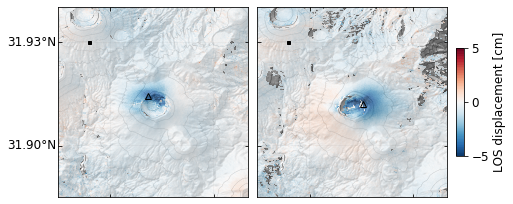

In [73]:
## Figure 2. (a-b) Map view of deformation from InSAR
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[6, 3], sharex=True)

# view.py options
dem_file  = os.path.expanduser('~/insarlab/Kirishima/DEM/Shinmoe10m.dem.wgs84')
opt = ' --sub-lon 130.855 130.91 --sub-lat 31.885 31.94 '
opt += '--dem {} --contour-step 100 --contour-smooth 0.0 '.format(dem_file)
opt += ' -c RdBu_r -v -5 5 -u cm '
opt += ' --notitle --fontsize 12 --ref-size 3 --lalo-step 0.03 --nocbar --noscalebar --alpha 0.7 '
#opt += ' --scalebar 0.25 0.15 0.2 --scalebar-pad 0.1 '
#opt += ' --ref-yx {} {} '.format(atr1['REF_Y'], atr1['REF_X']) #use the same reference point as displacement time-seris
#opt += ' --noverbose '

# ALOS asc T424
cmd = 'view.py {f} --lalo-loc 1 0 0 0 {o}'.format(f=unw_file1, o=opt)
data1, atr, inps = view.prep_slice(cmd)
axs[0], inps, im, cbar = view.plot_slice(axs[0], data1, atr, inps)
axs[0].plot(lon1, lat1, "k^", mfc='none', mew=1., ms=6)

# ALOS desc T73
cmd = 'view.py {f} --lalo-loc 0 0 0 0 {o}'.format(f=unw_file2, o=opt)
data2, atr, inps = view.prep_slice(cmd)
axs[1], inps, im, cbar = view.plot_slice(axs[1], data2, atr, inps)
axs[1].plot(lon2, lat2, "k^", mfc='none', mew=1., ms=6)

fig.subplots_adjust(wspace=0.05, left=0.05, right=0.95, top=0.95, bottom=0.05)

# colorbar
cax = fig.add_axes([0.97, 0.25, 0.02, 0.5])
cbar = plt.colorbar(im, cax=cax, orientation='vertical', ticks=[-5, 0, 5])
cbar.ax.tick_params(labelsize=font_size)
cbar.set_label('LOS displacement [cm]', fontsize=font_size)

# output
out_file = os.path.abspath('dis_map_asc_desc.png')
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save figure to file', out_file)
plt.show()

### Run asc_desc2horz_vert.py

In [59]:
## Generate decomposed file
out_dir = os.path.expanduser('~/insarlab/Kirishima/Model/data')
hz_file = os.path.join(out_dir, 'ShinmoeHz.h5')
up_file = os.path.join(out_dir, 'ShinmoeUp.h5')
scp_args = '{f1} {f2} -o {o1} {o2}'.format(f1=unw_file1, f2=unw_file2, o1=hz_file, o2=up_file)
print('asc_desc2horz_vert.py', scp_args)
#asc_desc2horz_vert.main(scp_args.split())

asc_desc2horz_vert.py /Users/yunjunz/insarlab/Kirishima/ShinmoeAlosAT424/mintpy/20080929_20100520.unw /Users/yunjunz/insarlab/Kirishima/ShinmoeAlosDT73/mintpy/20081012_20100302.unw -o /Users/yunjunz/insarlab/Kirishima/Model/data/ShinmoeHz.h5 /Users/yunjunz/insarlab/Kirishima/Model/data/ShinmoeUp.h5


### Plot horz / vert displacement map

save figure to file /Users/yunjunz/Documents/Paper/2019_Kirishima/figs_src/obs_ALOS1/dis_map_horz_vert.png


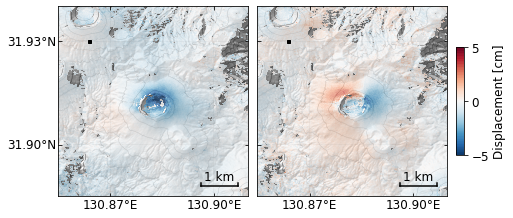

In [71]:
# view.py options
dem_file  = os.path.expanduser('~/insarlab/Kirishima/DEM/Shinmoe10m.dem.wgs84')
opt = ' --sub-lon 130.855 130.91 --sub-lat 31.885 31.94 '
opt += '--dem {} --contour-step 100 --contour-smooth 0.0 '.format(dem_file)
opt += ' -c RdBu_r -v -5 5 -u cm '
opt += ' --notitle --fontsize 12 --ref-size 3 --lalo-step 0.03 --nocbar '
opt += ' --scalebar 0.2 0.85 0.05 --scalebar-pad 0.05 --alpha 0.7 '
#opt += ' --ref-yx {} {} '.format(atr['REF_Y'], atr['REF_X']) #use the same reference point as displacement time-seris
opt += ' --noverbose '

## plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[6, 3])

# vertical
cmd = 'view.py {f} --lalo-loc 1 0 0 1 {o}'.format(f=up_file, o=opt)
dataUp, atr, inps = view.prep_slice(cmd)
axs[0], inps, im, cbar = view.plot_slice(axs[0], dataUp, atr, inps)

# horizontal
cmd = 'view.py {f} --lalo-loc 0 0 0 1 {o} '.format(f=hz_file, o=opt)
dataHz, atr, inps = view.prep_slice(cmd)
axs[1], inps, im, cbar = view.plot_slice(axs[1], dataHz, atr, inps)

fig.subplots_adjust(wspace=0.05, left=0.05, right=0.95, top=0.95, bottom=0.05)

# colorbar
cax = fig.add_axes([0.97, 0.25, 0.02, 0.5])
cbar = plt.colorbar(im, cax=cax, orientation='vertical', ticks=[-5, 0, 5])
cbar.ax.tick_params(labelsize=font_size)
cbar.set_label('Displacement [cm]', fontsize=font_size)

# output
out_file = os.path.abspath('dis_map_horz_vert.png')
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save figure to file', out_file)
plt.show()

### Preliminary analysis of source geometry based on the ratio of max horz / vert displacement

In [74]:
max_west_dis = -np.nanmin(dataHz)
max_east_dis = np.nanmax(dataHz)
max_vert_dis = np.nanmax(np.abs(dataUp))
print('max vert displacement: {:.2f} cm'.format(max_vert_dis))
print('max east displacement: {:.2f} cm; horz/vert ratio: {:.2f}'.format(max_east_dis, max_east_dis/max_vert_dis))
print('max west displacement: {:.2f} cm; horz/vert ratio: {:.2f}'.format(max_west_dis, max_west_dis/max_vert_dis))

max vert displacement: 6.50 cm
max east displacement: 3.25 cm; horz/vert ratio: 0.50
max west displacement: 4.65 cm; horz/vert ratio: 0.72


Typical ratio of max horz/vert displacement (Fig. 4 and 6 in Fialko et al., 2001):
+ Sills: < 0.3
+ Spherical sources: ~0.4

Thus, we model this displacement as **Prolate Spheroid** (Yang, 1988) or **Compound Dislocation Models** (Nikkhoo, 2016).